In [1]:
# importing required libraries
import cv2
from pylab import *
from PIL import Image
from matplotlib import pyplot as plt

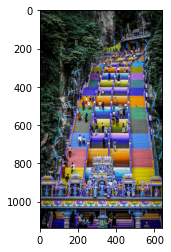

In [2]:
#Reading image from local filesystem
malaysia = cv2.imread('/home/sumit/Pictures/malaysia.jpg')

imshow(malaysia)

Colors are bit different in above image since OpenCV uses channel order of BGR instead of RGB

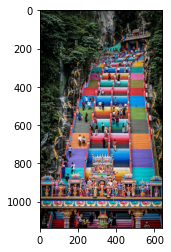

In [3]:
channels_reversed = malaysia[:,:,::-1]
imshow(channels_reversed)

In [4]:
malaysia.shape

(1138, 640, 3)

In [5]:
malaysia.dtype

dtype('uint8')

In [6]:
#actual image is bigger in size hence resizing image for better view in notebook

rimg = cv2.resize(malaysia, (240,427))
rimg.shape

(427, 240, 3)

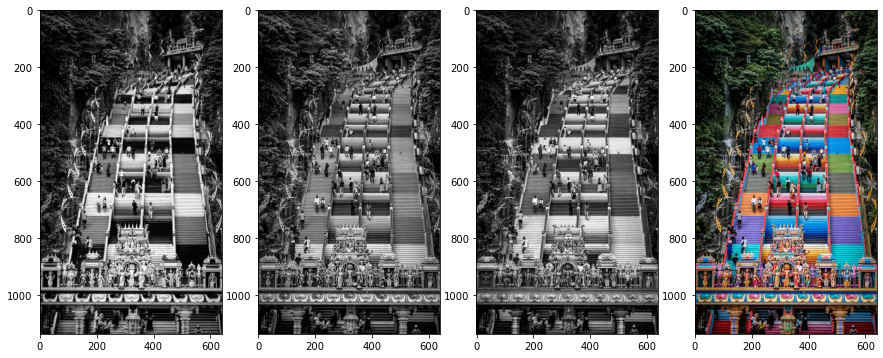

In [7]:
# Split the image into the B,G,R components
b,g,r = cv2.split(channels_reversed)
# Merge the individual channels into a BGR image
imgMerged = cv2.merge((b,g,r))

plt.rcParams['figure.figsize'] = [15,15]
fig, ax = plt.subplots(1,4)
ax[0].imshow(b,cmap='gray')
ax[1].imshow(g,cmap='gray')
ax[2].imshow(r,cmap='gray')
ax[3].imshow(imgMerged)

          Red Channel               Green Channel            Blue Channel              Merged Output

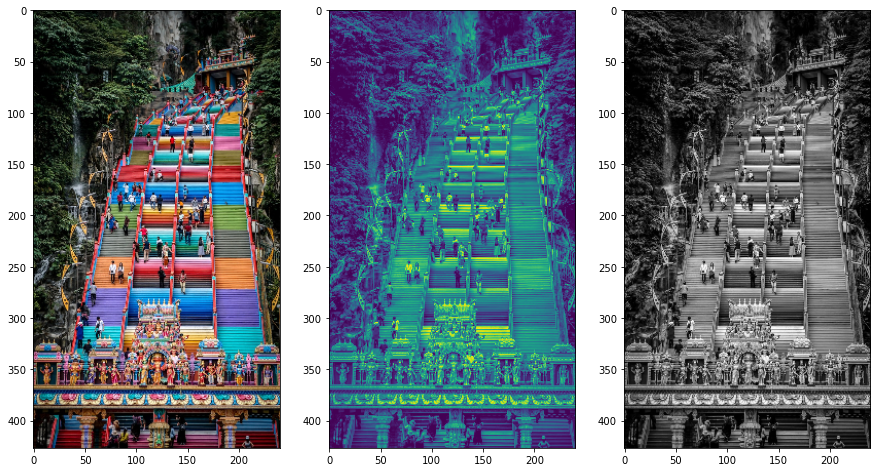

In [8]:
#converting image from BGR to RGB & GRAY
color = cv2.cvtColor(rimg, cv2.COLOR_BGR2RGB) #BGR to RGB conversion
gray = cv2.cvtColor(rimg, cv2.COLOR_BGR2GRAY) #BGR to GRAY conversion

plt.rcParams['figure.figsize'] = [15,15]
fig, ax = plt.subplots(1,3)
ax[0].imshow(color) 
ax[1].imshow(gray)

#cmap parameter in matplotlib is set default to: 'viridis' hence we need to assign it to 'gray'
ax[2].imshow(gray,cmap='gray')

In [9]:
print(color.shape)
print(gray.shape)

#here we can see no channels are present in gray

(427, 240, 3)
(427, 240)


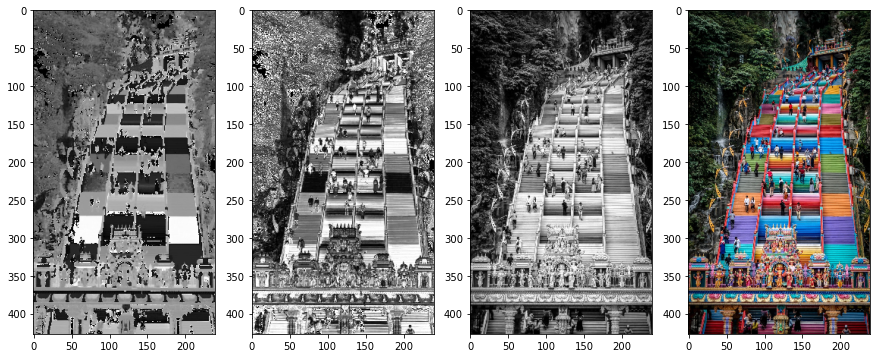

In [10]:
#Changing to HSV color space

img_hsv = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)

h,s,v = cv2.split(img_hsv)

fig, ax = plt.subplots(1,4)
ax[0].imshow(h,cmap='gray')
ax[1].imshow(s,cmap='gray')
ax[2].imshow(v,cmap='gray')
ax[3].imshow(color)

          H Channel                 S Channel                 V Channel               Original Image

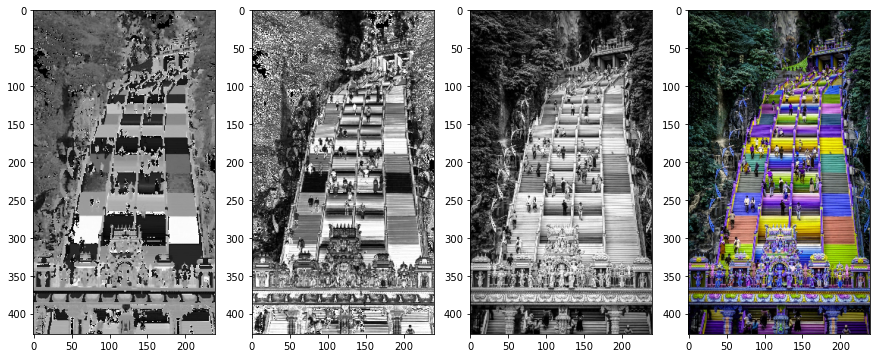

In [11]:
#Modifying individual channel
newh = h+10
merged = cv2.merge((newh,s,v))
modimg = cv2.cvtColor(merged,cv2.COLOR_HSV2RGB)

fig, ax = plt.subplots(1,4)
ax[0].imshow(h,cmap='gray')
ax[1].imshow(s,cmap='gray')
ax[2].imshow(v,cmap='gray')
ax[3].imshow(modimg)

        NewH Channel                S Channel                 V Channel              Modified Image

In above image we can see the difference in merged image, which is the result of changed H value.

In [12]:
#Saving the processed image :

filename = 'modified_malaysia.jpg'
cv2.imwrite('/home/sumit/Pictures/'+filename,modimg)

True

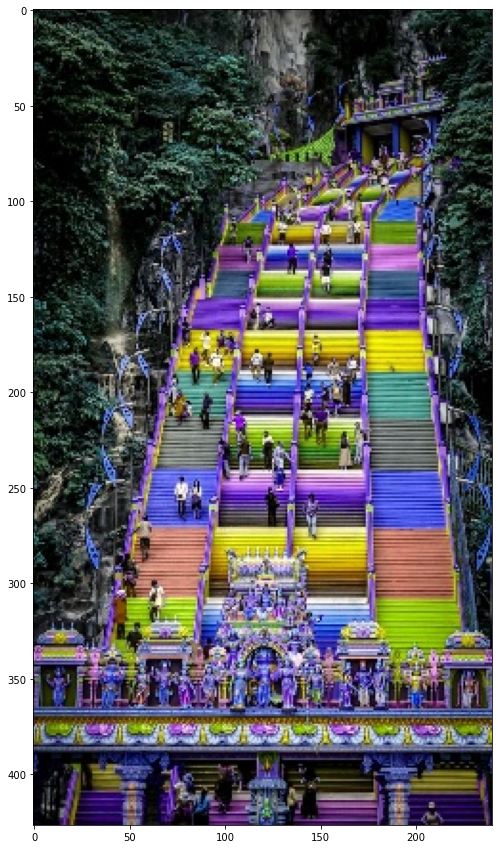

In [13]:
#Reading image from local filesystem
img2 = cv2.imread('/home/sumit/Pictures/modified_malaysia.jpg')

imshow(img2)

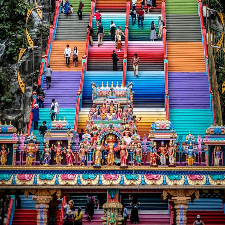

(225, 225, 3)

In [14]:
#Cropping image

cropped = color[200:425, 10:235]
display(Image.fromarray(cropped))
cropped.shape

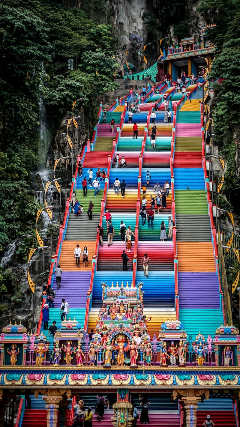

In [15]:
display(Image.fromarray(color))

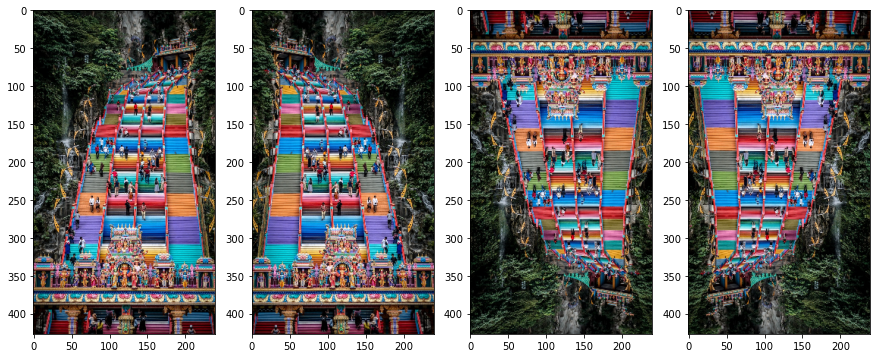

In [16]:
#Flipping Image

h_flip = cv2.flip(color,1) #flipped Horizontally
v_flip = cv2.flip(color,0) #flipped Vertically
b_flip = cv2.flip(color,-1) #flipped Both ways

fig, ax = plt.subplots(1,4)
ax[0].imshow(color)
ax[1].imshow(h_flip)
ax[2].imshow(v_flip)
ax[3].imshow(b_flip)

        Original Image           Horizontal Flip            Vertical Flip           Both ways flipped

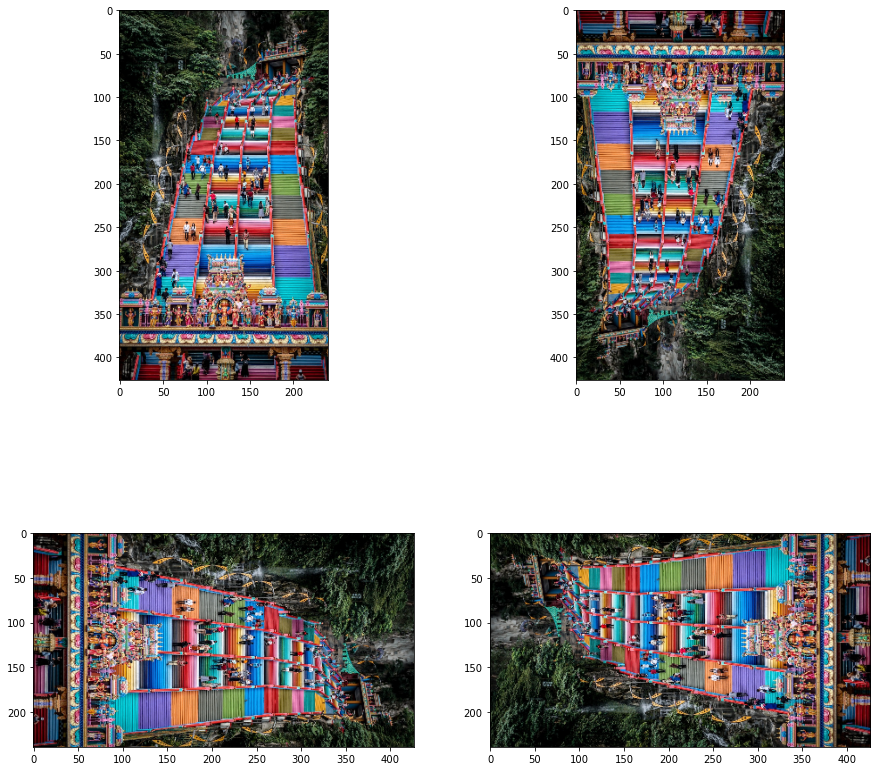

In [17]:
#Rotating Image
rotated180 = cv2.rotate(color, cv2.ROTATE_180)
rotated90 = cv2.rotate(color, cv2.ROTATE_90_CLOCKWISE)
rotatedn90 = cv2.rotate(color, cv2.ROTATE_90_COUNTERCLOCKWISE)

fig, ax = plt.subplots(2,2)
ax[0,0].imshow(color)
ax[0,1].imshow(rotated180)
ax[1,0].imshow(rotated90)
ax[1,1].imshow(rotatedn90)

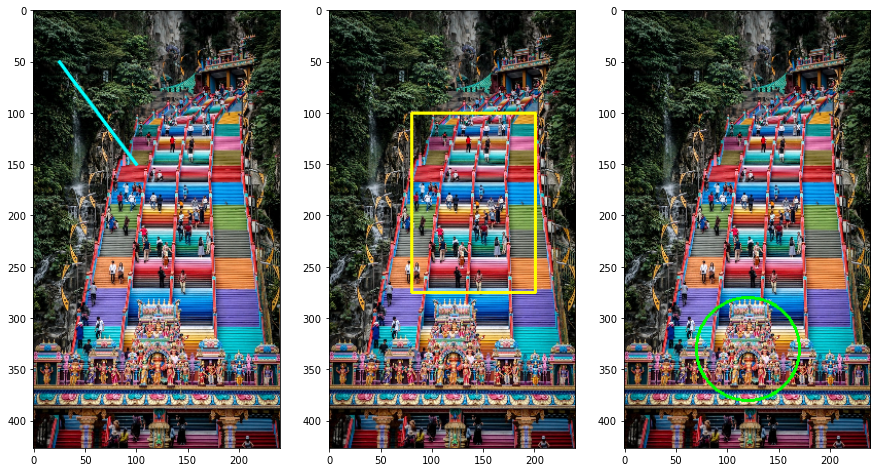

In [18]:
#Drawing shapes over the image - Line & Rectangle

#make a copy of the original image
sh1 = color.copy()
sh2 = color.copy()
sh3 = color.copy()

#define the starting and end points of the rectangle
start_point =(80,100)
end_point =(200,275)

#drawing a line
res1 = cv2.line(sh1,(25,50),(100,150),(0,255,255), thickness = 2, lineType=cv2.LINE_AA)

#draw the rectangle
res2 = cv2.rectangle(sh2, start_point, end_point, (255, 255, 0), thickness = 2, lineType=cv2.LINE_8) 

#draw the circle
res3 = cv2.circle(sh3, (120,330), 50, (0,255,0), thickness = 2, lineType=cv2.LINE_4)

fig, ax = plt.subplots(1,3)
ax[0].imshow(res1) 
ax[1].imshow(res2)
ax[2].imshow(res3)